In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures,RobustScaler,PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [35]:
df4=pd.read_csv('Loan.csv')

In [36]:
df4

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [37]:
df4.describe()


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [38]:
df4.groupby('LoanApproved').size()

LoanApproved
0    15220
1     4780
dtype: int64

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

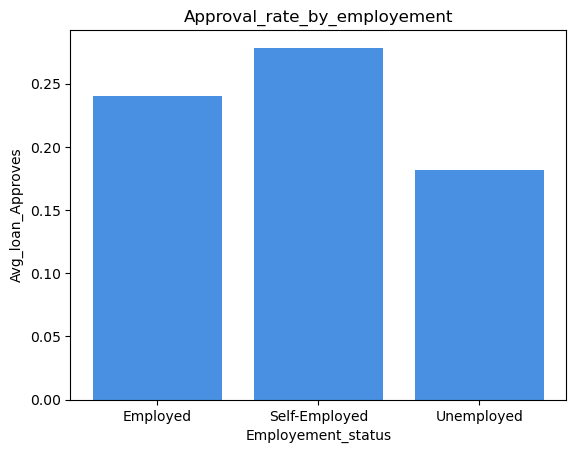

In [40]:
#loan_approved
approval_rate_by_employment=df4.groupby("EmploymentStatus")["LoanApproved"].mean().reset_index(name="Avg_loan_Approves")
approval_rate_by_employment
plt.bar(approval_rate_by_employment['EmploymentStatus'],approval_rate_by_employment['Avg_loan_Approves'],color='#4A90E2')
plt.title('Approval_rate_by_employement')
plt.xlabel('Employement_status')
plt.ylabel('Avg_loan_Approves')
plt.show()

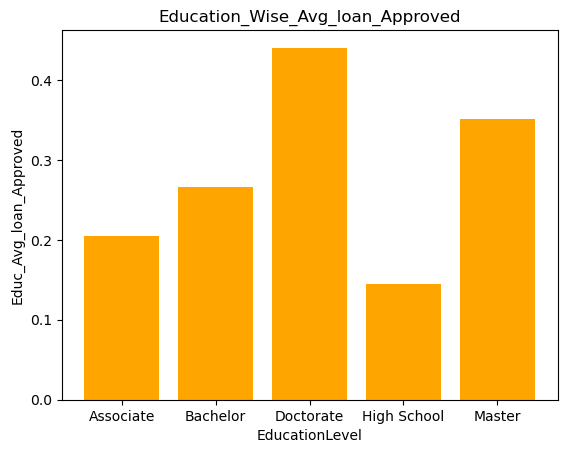

In [41]:
#Education level
loan_approves_education=df4.groupby('EducationLevel')["LoanApproved"].mean().reset_index(name="Educ_Avg_loan_Approved")
plt.bar(loan_approves_education["EducationLevel"],loan_approves_education['Educ_Avg_loan_Approved'],color='#FFA500')
plt.title("Education_Wise_Avg_loan_Approved")
plt.xlabel('EducationLevel')
plt.ylabel('Educ_Avg_loan_Approved')
plt.show()

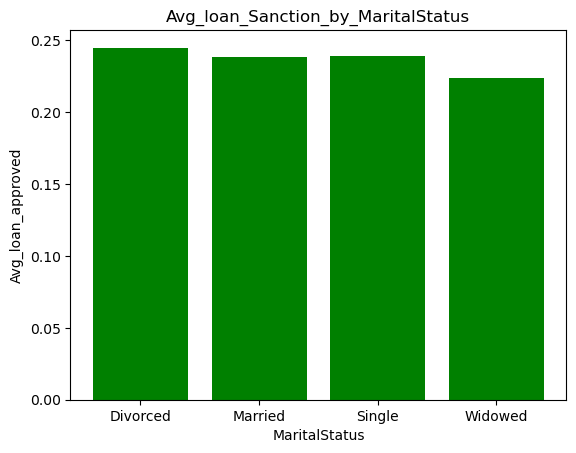

In [42]:
approval_rate_by_marital_status=df4.groupby('MaritalStatus')['LoanApproved'].mean().reset_index(name="Avg_loan_approved")
approval_rate_by_marital_status
plt.bar(approval_rate_by_marital_status["MaritalStatus"],approval_rate_by_marital_status["Avg_loan_approved"],color="green")
plt.xlabel('MaritalStatus')
plt.ylabel('Avg_loan_approved')
plt.title('Avg_loan_Sanction_by_MaritalStatus')
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15400\2252294716.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_loan_Approved = df4.groupby(pd.cut(df4['Age'], bins=bins, labels=labels, right=False))['LoanApproved'].mean().reset_index()


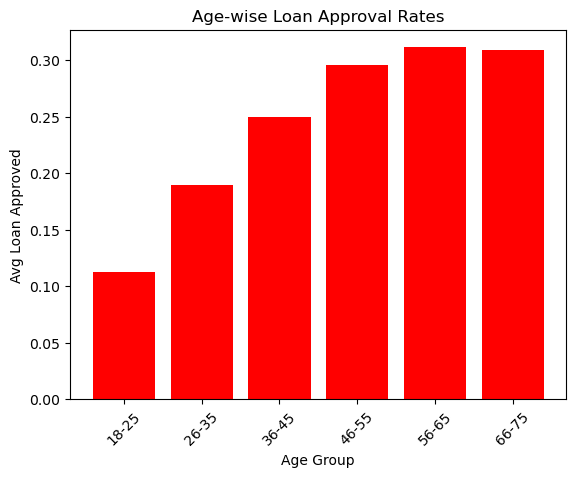

In [43]:
bins = [0, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
Age_loan_Approved = df4.groupby(pd.cut(df4['Age'], bins=bins, labels=labels, right=False))['LoanApproved'].mean().reset_index()
plt.bar(Age_loan_Approved['Age'], Age_loan_Approved['LoanApproved'], color='red')
plt.title("Age-wise Loan Approval Rates")
plt.xlabel("Age Group")
plt.ylabel("Avg Loan Approved")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15400\1719902608.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  IncomeGroup_loan_Approved = df4.groupby(pd.cut(df4['AnnualIncome'], bins=income_bins, labels=income_labels, right=False))['LoanApproved'].mean().reset_index()


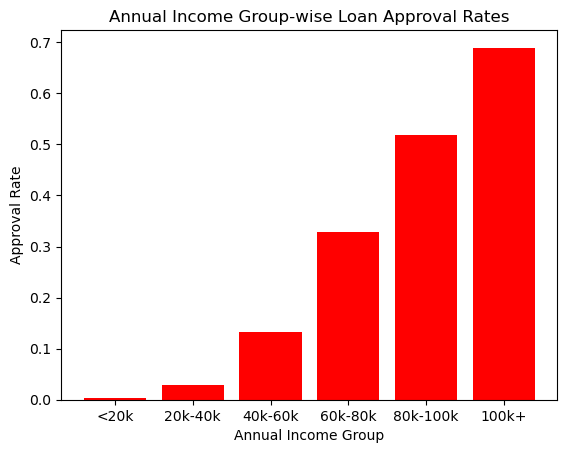

In [44]:
# Create income groups
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']

IncomeGroup_loan_Approved = df4.groupby(pd.cut(df4['AnnualIncome'], bins=income_bins, labels=income_labels, right=False))['LoanApproved'].mean().reset_index()
plt.bar(IncomeGroup_loan_Approved['AnnualIncome'], IncomeGroup_loan_Approved['LoanApproved'], color='red')
plt.title("Annual Income Group-wise Loan Approval Rates")
plt.xlabel('Annual Income Group')
plt.ylabel('Approval Rate')
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15400\3350452510.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_by_credit_score=df4.groupby(pd.cut(df4["CreditScore"],bins=credit_score_bins, labels=credit_score_labels, right=False))['LoanApproved'].mean().reset_index()


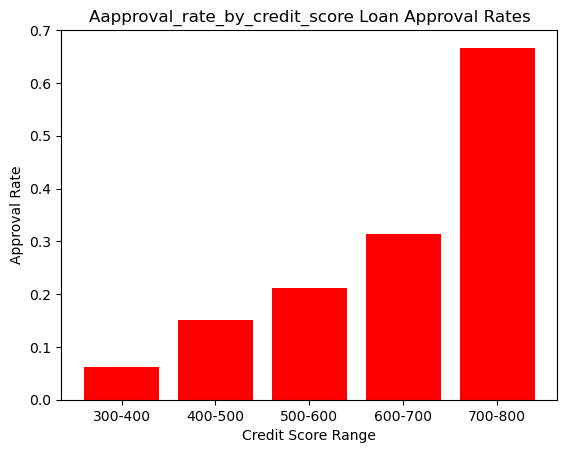

In [45]:
credit_score_bins = [300, 400, 500, 600, 700, 800]
credit_score_labels = ['300-400', '400-500', '500-600', '600-700', '700-800']
approval_rate_by_credit_score=df4.groupby(pd.cut(df4["CreditScore"],bins=credit_score_bins, labels=credit_score_labels, right=False))['LoanApproved'].mean().reset_index()
plt.bar(approval_rate_by_credit_score['CreditScore'], approval_rate_by_credit_score['LoanApproved'], color='red')
plt.title("Aapproval_rate_by_credit_score Loan Approval Rates")
plt.xlabel('Credit Score Range')
plt.ylabel('Approval Rate')
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15400\3698866339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_by_loan_amount =df4.groupby(pd.cut(df4['LoanAmount'],bins=loan_amount_bins,labels=loan_amount_labels))['LoanApproved'].mean().reset_index()


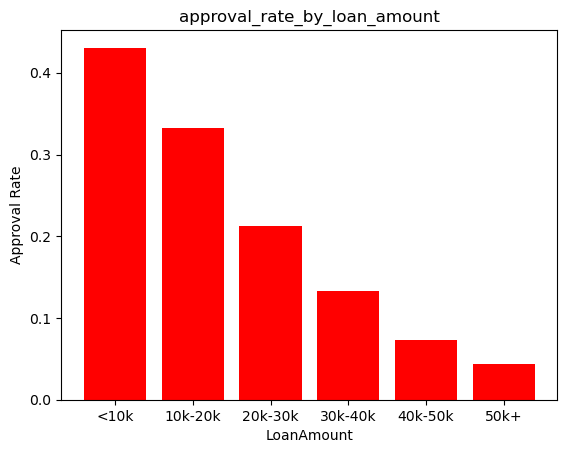

In [46]:
loan_amount_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
loan_amount_labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']
approval_rate_by_loan_amount =df4.groupby(pd.cut(df4['LoanAmount'],bins=loan_amount_bins,labels=loan_amount_labels))['LoanApproved'].mean().reset_index()
plt.bar(approval_rate_by_loan_amount['LoanAmount'], approval_rate_by_loan_amount['LoanApproved'], color='red')
plt.title("approval_rate_by_loan_amount")
plt.xlabel('LoanAmount')
plt.ylabel('Approval Rate')
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15400\4103228444.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_by_loan_duration=df4.groupby(pd.cut(df4["LoanDuration"],bins=loan_duration_bins,labels=loan_duration_labels))["LoanApproved"].mean().reset_index()


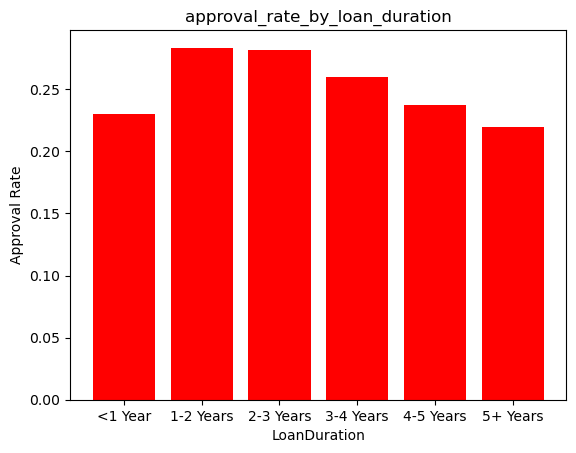

In [47]:
loan_duration_bins = [0, 12, 24, 36, 48, 60, 72]
loan_duration_labels = ['<1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']
approval_rate_by_loan_duration=df4.groupby(pd.cut(df4["LoanDuration"],bins=loan_duration_bins,labels=loan_duration_labels))["LoanApproved"].mean().reset_index()
plt.bar(approval_rate_by_loan_duration['LoanDuration'], approval_rate_by_loan_duration['LoanApproved'], color='red')
plt.title("approval_rate_by_loan_duration")
plt.xlabel('LoanDuration')
plt.ylabel('Approval Rate')
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15400\1806098320.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_by_job_tenure=df4.groupby(pd.cut(df4["JobTenure"],bins=job_tenure_bins,labels=job_tenure_labels))["LoanApproved"].mean().reset_index()


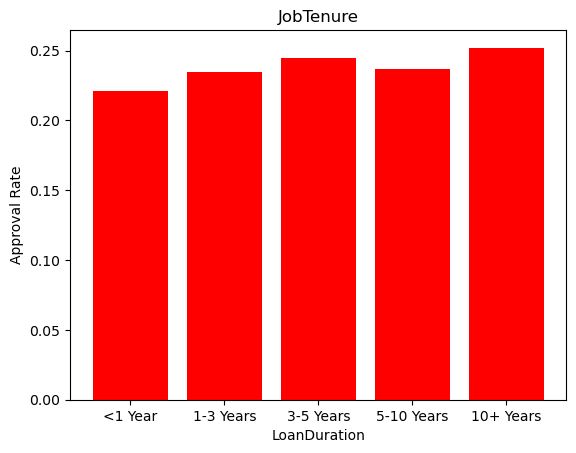

In [48]:
job_tenure_bins = [0, 1, 3, 5, 10, 15]
job_tenure_labels = ['<1 Year', '1-3 Years', '3-5 Years', '5-10 Years', '10+ Years']
approval_rate_by_job_tenure=df4.groupby(pd.cut(df4["JobTenure"],bins=job_tenure_bins,labels=job_tenure_labels))["LoanApproved"].mean().reset_index()
plt.bar(approval_rate_by_job_tenure['JobTenure'], approval_rate_by_job_tenure['LoanApproved'], color='red')
plt.title("JobTenure")
plt.xlabel('LoanDuration')
plt.ylabel('Approval Rate')
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_15400\797282043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_by_risk_score =df4.groupby(pd.cut(df4['RiskScore'],bins=risk_score_bins,labels=risk_score_labels))['LoanApproved'].mean().reset_index()


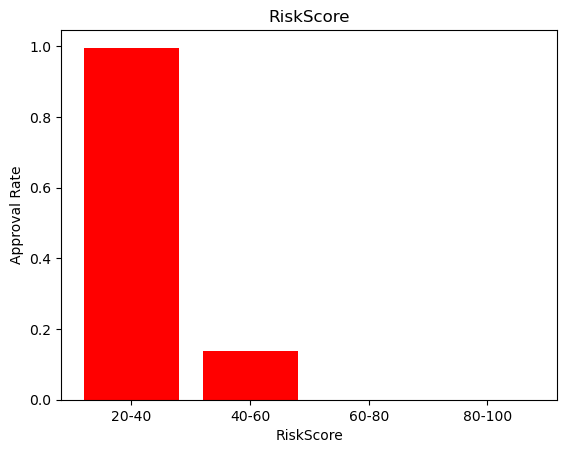

In [49]:
risk_score_bins = [0, 20, 40, 60, 80, 100]
risk_score_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
approval_rate_by_risk_score =df4.groupby(pd.cut(df4['RiskScore'],bins=risk_score_bins,labels=risk_score_labels))['LoanApproved'].mean().reset_index()
plt.bar(approval_rate_by_risk_score['RiskScore'], approval_rate_by_risk_score['LoanApproved'], color='red')
plt.title("RiskScore")
plt.xlabel('RiskScore')
plt.ylabel('Approval Rate')
plt.show()

<Axes: ylabel='Age'>

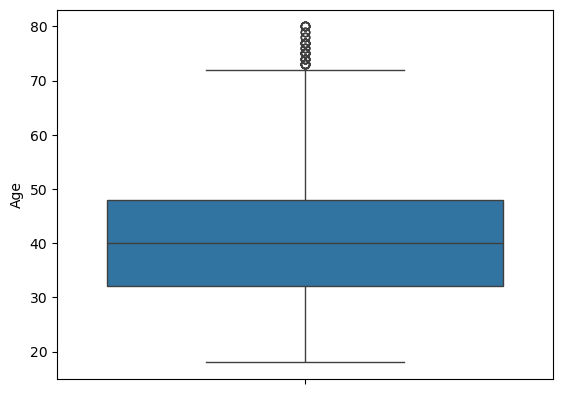

In [50]:
sns.boxplot(df4['Age'])

In [51]:

from scipy.stats import skew  # Make sure this is included

# Filter out non-numeric columns
numeric_df = df4.select_dtypes(include=[np.number])

# Calculate skewness for each numeric column and print results with labels
for column in numeric_df.columns:
    skewness_value = skew(numeric_df[column].dropna())  # dropna() handles any missing values in the column
    if abs(skewness_value) > 0.5:
        skew_label = "Highly Skewed"
    elif abs(skewness_value) > 0.3:
        skew_label = "Moderately Skewed"
    else:
        skew_label = "Symmetric/Low Skew"
    
    print(f"{column}: Skewness = {skewness_value:.3f} ({skew_label})")


Age: Skewness = 0.186 (Symmetric/Low Skew)
AnnualIncome: Skewness = 2.089 (Highly Skewed)
CreditScore: Skewness = -0.597 (Highly Skewed)
Experience: Skewness = 0.340 (Moderately Skewed)
LoanAmount: Skewness = 1.834 (Highly Skewed)
LoanDuration: Skewness = 0.651 (Highly Skewed)
NumberOfDependents: Skewness = 0.640 (Highly Skewed)
MonthlyDebtPayments: Skewness = 1.653 (Highly Skewed)
CreditCardUtilizationRate: Skewness = 0.601 (Highly Skewed)
NumberOfOpenCreditLines: Skewness = 0.600 (Highly Skewed)
NumberOfCreditInquiries: Skewness = 1.012 (Highly Skewed)
DebtToIncomeRatio: Skewness = 0.594 (Highly Skewed)
BankruptcyHistory: Skewness = 4.017 (Highly Skewed)
PreviousLoanDefaults: Skewness = 2.666 (Highly Skewed)
PaymentHistory: Skewness = 0.213 (Symmetric/Low Skew)
LengthOfCreditHistory: Skewness = 0.003 (Symmetric/Low Skew)
SavingsAccountBalance: Skewness = 6.060 (Highly Skewed)
CheckingAccountBalance: Skewness = 4.746 (Highly Skewed)
TotalAssets: Skewness = 5.311 (Highly Skewed)
TotalL

In [52]:
#finding Outliers
for column in df4.select_dtypes(include=[np.number]).columns:
    Q1=df4[column].quantile(0.25)
    Q3=df4[column].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df4[(df4[column]<lower_bound)|(df4[column]>upper_bound)]
    outlier_count = outliers.shape[0]

    # Print the results
    print(f"{column}:")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of Outliers: {outlier_count}")

Age:
  Lower Bound: 8.0
  Upper Bound: 72.0
  Number of Outliers: 64
AnnualIncome:
  Lower Bound: -32389.0
  Upper Bound: 138459.0
  Number of Outliers: 947
CreditScore:
  Lower Bound: 436.5
  Upper Bound: 712.5
  Number of Outliers: 242
Experience:
  Lower Bound: -15.0
  Upper Bound: 49.0
  Number of Outliers: 75
LoanAmount:
  Lower Bound: -7315.0
  Upper Bound: 53725.0
  Number of Outliers: 746
LoanDuration:
  Lower Bound: -18.0
  Upper Bound: 126.0
  Number of Outliers: 0
NumberOfDependents:
  Lower Bound: -3.0
  Upper Bound: 5.0
  Number of Outliers: 0
MonthlyDebtPayments:
  Lower Bound: -131.0
  Upper Bound: 981.0
  Number of Outliers: 744
CreditCardUtilizationRate:
  Lower Bound: -0.18396692905046616
  Upper Bound: 0.7353943557101854
  Number of Outliers: 130
NumberOfOpenCreditLines:
  Lower Bound: -1.0
  Upper Bound: 7.0
  Number of Outliers: 249
NumberOfCreditInquiries:
  Lower Bound: -3.0
  Upper Bound: 5.0
  Number of Outliers: 16
DebtToIncomeRatio:
  Lower Bound: -0.18290369

In [53]:
#capping Outliers
columns_to_cap = [
    "AnnualIncome", "LoanAmount", "MonthlyDebtPayments", "SavingsAccountBalance",
    "CheckingAccountBalance", "TotalAssets", "TotalLiabilities", "MonthlyIncome",
    "NetWorth", "MonthlyLoanPayment", "TotalDebtToIncomeRatio"
]

for column in columns_to_cap:
    Q1=df4[column].quantile(0.25)
    Q3=df4[column].quantile(0.75)
    Iqr=Q3-Q1

    lower_bound=Q1-1.5*Iqr
    upper_bound=Q3+1.5*Iqr
df4[column]=np.where(df4[column]<lower_bound,lower_bound,
                    np.where(df4[column]>upper_bound,upper_bound,df4[column]))
print("Capping of outliers completed")


Capping of outliers completed


In [54]:
df4.drop(columns=["ApplicationDate"],axis=1,inplace=True)

In [55]:
le = LabelEncoder()
df4['EducationLevel'] = le.fit_transform(df4['EducationLevel'])
df4['HomeOwnershipStatus'] = le.fit_transform(df4['HomeOwnershipStatus'])
df4['LoanPurpose'] = le.fit_transform(df4['LoanPurpose'])


In [56]:
df4 = pd.get_dummies(df4, columns=['EmploymentStatus','MaritalStatus'], drop_first=True)


In [57]:
X=df4.drop("LoanApproved",axis=1)
y=df4['LoanApproved']

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
smote = SMOTE(sampling_strategy=0.5, random_state=42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [60]:
X_train_resampled.shape

(16047, 37)

In [61]:
y_val.shape

(6000,)

In [62]:
Numerical_transformer=ColumnTransformer(transformers=[
    ('log1p',FunctionTransformer(np.log1p,validate=True),["AnnualIncome","LoanAmount","LoanDuration","MonthlyDebtPayments","CreditCardUtilizationRate",
                                                            "NumberOfOpenCreditLines","NumberOfCreditInquiries","DebtToIncomeRatio",
                                                            "BankruptcyHistory","PreviousLoanDefaults","SavingsAccountBalance",
                                                            "CheckingAccountBalance","TotalAssets","TotalLiabilities","MonthlyIncome","MonthlyLoanPayment","TotalDebtToIncomeRatio"]),
    ('sqrt',FunctionTransformer(np.sqrt,validate=True),["NumberOfDependents","PaymentHistory","LengthOfCreditHistory","JobTenure","UtilityBillsPaymentHistory"]),
    ('box-cox',PowerTransformer(method='box-cox',),["LoanAmount","LoanDuration","TotalAssets","MonthlyLoanPayment"]),
    ('yeo-jhon',PowerTransformer(method='yeo-johnson',),["CreditScore","NetWorth","BankruptcyHistory","PreviousLoanDefaults"])
],remainder="passthrough")

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", Numerical_transformer, [
            "AnnualIncome", "LoanAmount", "LoanDuration", "MonthlyDebtPayments", 
            "CreditCardUtilizationRate", "NumberOfOpenCreditLines", 
            "NumberOfCreditInquiries", "DebtToIncomeRatio", "BankruptcyHistory", 
            "PreviousLoanDefaults", "SavingsAccountBalance", 
            "CheckingAccountBalance", "TotalAssets", "TotalLiabilities", 
            "MonthlyIncome", "MonthlyLoanPayment", 
            "TotalDebtToIncomeRatio",
            "NumberOfDependents", "PaymentHistory", "LengthOfCreditHistory", 
            "JobTenure", "UtilityBillsPaymentHistory", 
            "CreditScore", "NetWorth"
        ]),
    ],
    remainder='passthrough'
)

In [68]:

classifiers = {
    'Logistic Regression L2': LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),  # L2 Regularization
    'Logistic Regression L1': LogisticRegression(penalty='l1', C=1.0, solver='liblinear'),  # L1 Regularization
    'Support Vector Classifier': SVC(class_weight='balanced', probability=True),
    'Linear SVC': LinearSVC(),  
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),  
    'AdaBoost': AdaBoostClassifier(),  
    'Decision Tree': DecisionTreeClassifier(),  
    'Gaussian Naive Bayes': GaussianNB(),  
    'Multi-layer Perceptron (MLP)': MLPClassifier(max_iter=2000),  
}

In [69]:
for model_name, model in classifiers.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing step
        ('scaler', RobustScaler()),
        ('pca', PCA(n_components=35)),# Scaling step
        ('classifier', model)             # Model step
    ])

    # Fit the model
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Predict on validation data
    y_pred = pipeline.predict(X_val)  # Make sure to use X_val for predictions

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
     # Print the results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

Model: Logistic Regression L2
Accuracy: 0.9991
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       1.00      1.00      1.00      1069

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Logistic Regression L1
Accuracy: 0.9991
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       1.00      1.00      1.00      1069

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Support Vector Classifier
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       1.00 

C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model: Linear SVC
Accuracy: 0.9991
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       1.00      1.00      1.00      1069

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Random Forest
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       1.00      1.00      1.00      1069

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Decision Tree
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       1.00      1.00      1.00      1069

  

C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.9947
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       0.99      0.99      0.99      1069

    accuracy                           0.99      3209
   macro avg       0.99      0.99      0.99      3209
weighted avg       0.99      0.99      0.99      3209

Model: Gaussian Naive Bayes
Accuracy: 0.9579
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2140
           1       0.96      0.91      0.94      1069

    accuracy                           0.96      3209
   macro avg       0.96      0.95      0.95      3209
weighted avg       0.96      0.96      0.96      3209

Model: Multi-layer Perceptron (MLP)
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       1.00      1.00    

In [70]:
# Define classifiers
from sklearn.model_selection import StratifiedKFold

    
# Define k-fold cross-validation object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over classifiers
for model_name, model in classifiers.items():
    accuracies = []

    # Perform k-fold cross-validation
    for train_index, val_index in kf.split(X_train_resampled, y_train_resampled):
        X_resample_fold, X_val = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
        y_resample_fold, y_val = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

        # Define pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=35)),
            ('classifier', model)
        ])

        # Fit pipeline with resampled data
        pipeline.fit(X_resample_fold, y_resample_fold)

        # Predict on validation data
        y_pred = pipeline.predict(X_val)

        # Evaluate model
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

    # Calculate and print average accuracy
    avg_accuracy = np.mean(accuracies)
    print(f"Model: {model_name}")
    print(f"Average Accuracy: {avg_accuracy:.4f}")

    # Optionally, print detailed classification report on the last fold
    print("Classification Report for Last Fold:")
    print(classification_report(y_val, y_pred))

Model: Logistic Regression L2
Average Accuracy: 0.9991
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2139
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Logistic Regression L1
Average Accuracy: 0.9990
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2139
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Support Vector Classifier
Average Accuracy: 0.9998
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0

C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

Model: Linear SVC
Average Accuracy: 0.9991
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2139
           1       1.00      1.00      1.00      1070

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Random Forest
Average Accuracy: 0.9882
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2139
           1       1.00      0.98      0.99      1070

    accuracy                           0.99      3209
   macro avg       0.99      0.99      0.99      3209
weighted avg       0.99      0.99      0.99      3209

Model: Decision Tree
Average Accuracy: 0.9573
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97  

C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Mih

Model: AdaBoost
Average Accuracy: 0.9944
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2139
           1       1.00      0.99      0.99      1070

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209

Model: Gaussian Naive Bayes
Average Accuracy: 0.9681
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2139
           1       0.98      0.93      0.96      1070

    accuracy                           0.97      3209
   macro avg       0.97      0.96      0.97      3209
weighted avg       0.97      0.97      0.97      3209

Model: Multi-layer Perceptron (MLP)
Average Accuracy: 0.9993
Classification Report for Last Fold:
              precision    recall  f1-score   support

           0       1.00  

[0.99778571 0.99928571 0.99942857 0.99964286 0.99971429]


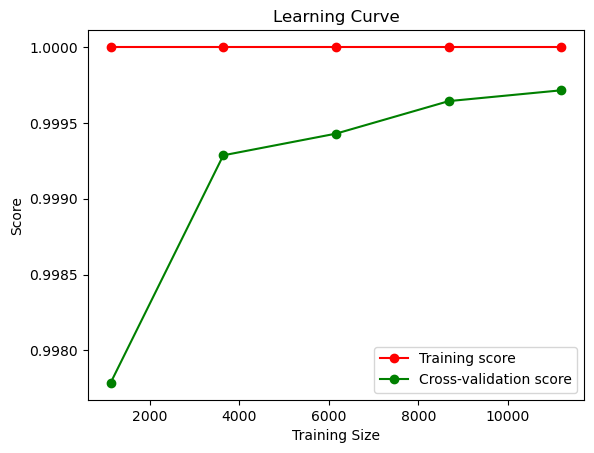

In [71]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
print(test_scores_mean)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


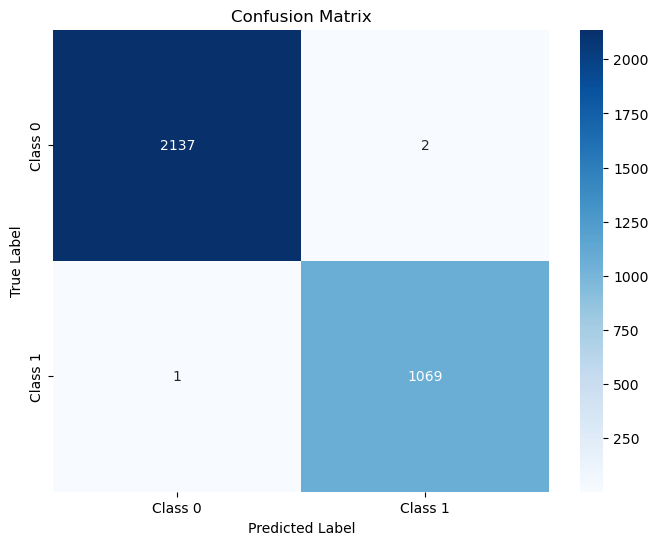

[[2137    2]
 [   1 1069]]


In [72]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
print(cm)

ROC AUC: 1.0000


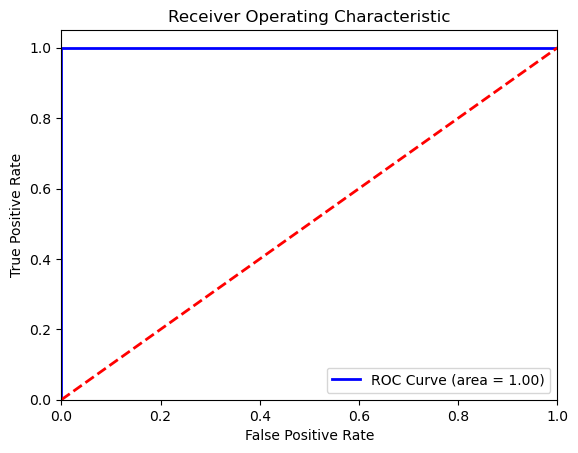

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities
y_prob = pipeline.predict_proba(X_val)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_val, y_prob)

# Calculate FPR and TPR for ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

print(f"ROC AUC: {roc_auc:.4f}")

# Optionally, plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
